## 7: Train a Perfect FeatsNet
Match the performance of basic-ML algo's in `metrics-4.ipynb` by using perfect predictor features.

What was holding me back?

How could this improvement be generalized?

In [1]:
import os, sys
import copy as copyroot
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from fastai2.basics import *
from fastai2.vision.all import *
%load_ext autoreload
%autoreload 2

from module.mnist_helpers import build_df, eda_fig_1, build_dls
from module.mnist_models import FeatsNet
from module.mnist_metrics import metrics_df

### Setup

In [4]:
path = untar_data(URLs.MNIST_TINY)
df = build_df(path)

y_names = ['point_topleft_x', 'point_topleft_y',]

db =   DataBlock(blocks=(ImageBlock(cls=PILImageBW), 
                         PointBlock), 
                splitter=RandomSplitter(seed=0),
                get_x=ColReader('fn', pref=path),
                get_y=ColReader(y_names),
                )
dl = db.dataloaders(df)

dls_tl = build_dls(target='topleft')
x, y = dls.one_batch()
x.shape

torch.Size([64, 1, 28, 28])

### Inspect Default Properties of NN-Learner

In [6]:
fn

FeatsNet(
  (flat): Flatten()
  (linear1): Linear(in_features=64, out_features=28, bias=True)
  (linear2): Linear(in_features=28, out_features=2, bias=False)
  (sig): SigmoidRange(low=-1.0, high=1)
)

In [8]:
learn.opt_func

<function fastai2.optimizer.Adam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.01, decouple_wd=True)>

In [9]:
learn.lr

0.001

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0030199517495930195)

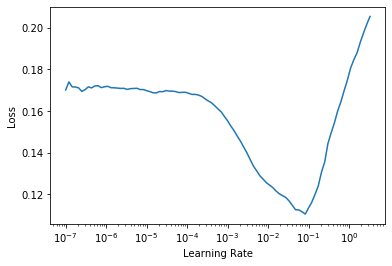

In [41]:
fn = FeatsNet(feats=['pts12', 'pts22'])
learn = Learner(dl, fn, loss_func=MSELossFlat(), y_range=(-1.,1.))
learn.lr_find()

### Big and Decently Good Fit
We train the learner for 90 epochs and a higher LR to acheive a pretty good fit, but still well below where it a.) should be with perfect features, b.) the perf of basic-ML algos (e.g. in metrics-4.ipynb) with the same features.

In [48]:
fn = FeatsNet(feats=['pts12', 'pts22'])
learn = Learner(dl, fn, loss_func=MSELossFlat(), y_range=(-1.,1.))
dl = db.dataloaders(df)
learn.fit(90,lr=2e-2)

epoch,train_loss,valid_loss,time
0,0.100120,0.059666,00:02
1,0.067349,0.040266,00:02
2,0.052017,0.022874,00:02
3,0.041648,0.013738,00:02
4,0.033893,0.011477,00:02
5,0.028240,0.006382,00:03
6,0.023462,0.006233,00:02
7,0.019702,0.003828,00:02
8,0.016683,0.003738,00:02
9,0.014287,0.003664,00:02


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f3fd0b07c20>
Traceback (most recent call last):
  File "/home/user/anaconda3/envs/fastai2/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/home/user/anaconda3/envs/fastai2/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 933, in _shutdown_workers
    self._workers_done_event.set()
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_done_event'


In [53]:
df = metrics_df(learn, 
           s_model="FeatsNet2.1122",
           s_details="feats=11,12 | epochs=90, lr=1e-2",
           s_target="topleft"
          )

In [54]:
df

,model,details,target,split,mse,mae,r2,dist_avg,dist_r2,sqdist_avg,sqdist_r2
0,FeatsNet2.1122,"feats=11,12 | epochs=90, lr=1e-2",topleft,valid,0.000682,0.019301,0.964155,0.029512,0.863392,0.001364,0.978663
1,FeatsNet2.1122,"feats=11,12 | epochs=90, lr=1e-2",topleft,train,0.000597,0.018213,0.969744,0.028530,0.878695,0.001194,0.984286


In [55]:
!ls assets/metrics-dfs/

metrics1-df-net3.csv   metrics2-df-rf.csv      metrics4-rflasso.csv
metrics2-df-lasso.csv  metrics3-df-resnet.csv  rcn6b-featsnet1x.csv


In [56]:
df.to_csv('assets/metrics-dfs/metrics5-featsnet2x.csv')